In [307]:
import random
import math

import matplotlib.pyplot as plt
import numpy as np

In [308]:
GROUP_ID = "04"
ALG = "ValItr"
TRACK_NAME = "tracks/2-track.txt"
CRASH_POS = "AAA"

In [309]:
def bresenhamsAlgorithm(x1, x2, y1, y2):
    dx = math.fabs(x1 -x2)
    dy = math.fabs(y1-y2)
    sx = (-1 if x2-x1 <0 else 1)
    sy = (-1 if y2-y1 <0 else 1)
    err = dx-dy
    p = 2* (dx-dy)
    linePoints = []
    while True:
        linePoints.append((x1, y1))
        if(x1 == x2 and y1 == y2):
            break
        e2 = 2 * err
        if e2 > -dy:
            err = err -dy
            x1 = x1 +sx
        if e2 < dx:
            err = err +dx
            y1 = y1 + sy

    return linePoints


In [310]:
print(bresenhamsAlgorithm(2,3,2,3))

[(2, 2), (3, 3)]


In [311]:
def makePlot(track):
    rows = track.size[1]
    cols = track.size[0]

    coloring = np.zeros((rows,cols,3))
    for y in range(rows):
        for x in range(cols):
            if track.array[x][y] == '.':
                coloring[y,x] = [1,1,1]
            elif track.array[x][y] == 'S':
                coloring[y,x] = [0,1,0]
            elif track.array[x][y] == 'F':
                coloring[y,x] = [1,0,0]
            else:
                coloring[y,x] = [0,0,0]

    plt.axis('off')
    plt.imshow(coloring)
    return plt


In [312]:
class RaceTrack:
    def __init__(self, file):
        with(open(file , "r") as f):
            lines = f.readlines()
            dims = lines[0]
            self.size = [0,0]
            self.size[0] = int(dims.split(",")[1].strip("\n"))
            self.size[1] = int(dims.split(",")[0])
            self.array = [[_ for y in range(self.size[1])] for x in range(self.size[0])]
            self.startStates = []
            self.finishStates = []
            self.walls = []
            self.track = []
            yIndex = 0
            for line in lines[1:]:
                xIndex = 0
                for char in line[:-1]:
                    if(char == "S"):
                        self.startStates.append((xIndex, yIndex))
                    elif(char == "F"):
                        self.finishStates.append((xIndex, yIndex))
                    elif(char == "#"):
                        self.walls.append((xIndex, yIndex))
                    else:
                        self.track.append((xIndex, yIndex))
                    self.array[xIndex][yIndex] = char
                    xIndex += 1
                yIndex += 1

    #prints track with car to command line, used for testing
    def printTrack(self, car):
        print("\n")
        for y in range(self.size[1]):
            line = ''
            for x in range(self.size[0]):
                if(car.xPos == x and car.yPos == y):
                    line += "C"
                else:
                    line += self.array[x][y]
            print(line)


In [313]:
class Car:
    def __init__(self, racetrack):
        self.startState = random.choice(racetrack.startStates)
        self.xPos = self.startState[0]
        self.yPos = self.startState[1]
        self.xVel = 0
        self.yVel = 0
        self.xAccel = 0
        self.yAccel = 0
        self.track = racetrack

    def updatePos(self, xAccel, yAccel, resetAfter):
        iXpos = self.xPos
        iYpos = self.yPos
        iXvel = self.xVel
        iYvel = self.yVel
        iXAcc = self.xAccel
        iYAcc = self.yAccel
        #print("xPos:", self.xPos, "yPos:", self.yPos, "\nxVel:", self.xVel, "yVel:", self.yVel, "\nxAccel:", xAccel, "yAccel:", yAccel )
        #accounting for oil slicks in the track
        randomNum = random.uniform(0,1)
        if(randomNum <= 0.2):
            oilSlick = True
        else:
            oilSlick = False
        if(oilSlick):
            self.xAccel = 0
            self.yAccel = 0
        else:
            self.xAccel = xAccel
            self.yAccel = yAccel
        self.xVel += self.xAccel
        self.yVel += self.yAccel
        if(self.xVel > 5):
            self.xVel = 5
        if(self.xVel < -5):
            self.xVel = -5
        if(self.yVel > 5):
            self.yVel = 5
        if(self.yVel < -5):
            self.yVel = -5
        self.xPos += self.xVel
        self.yPos += self.yVel
        #checking if the car collided with a wall
        carCourse = bresenhamsAlgorithm(iXpos, self.xPos, iYpos, self.yPos)
        crashed = False
        for i in range(len(carCourse)):
            pos = carCourse[i]
            #crash
            if(pos in self.track.walls):
                crashed = True
                nearestPoint = carCourse[i-1]
                break
        if(crashed):
            self.resetCar()
            if(CRASH_POS == "NRST"):
                self.xPos = nearestPoint[0]
                self.yPos = nearestPoint[1]

        if(resetAfter):
            self.xPos = iXpos
            self.yPos = iYpos
            self.xVel = iXvel
            self.yVel = iYvel
            self.xAccel = iXAcc
            self.yAccel = iYAcc


    def resetCar(self):
        self.xVel = 0
        self.yVel = 0
        self.xAccel = 0
        self.yAccel = 0
        self.xPos = self.startState[0]
        self.yPos = self.startState[1]
        #print("xPos:", self.xPos, "yPos:", self.yPos, "\nxVel:", self.xVel, "yVel:", self.yVel, "\nxAccel:", self.xAccel, "yAccel:", self.yAccel)


In [314]:
def qLearning(alpha, gamma, racetrack):
    possibleStates = racetrack.startStates + racetrack.walls + racetrack.finishStates
    possibleActions = []
    for xA in [-1,0,1]:
        for yA in [-1,0,1]:
            possibleActions.append((xA, yA))
    qTable = np.zeroes((len(possibleStates), len(possibleActions)))
    freqTable = np.zeroes((len(possibleStates), len(possibleActions)))




##############################
####.................#########
###...................########
##....................########
#......................#######
#.......###########.....######
#......#############.....#####
#.....##############.....#####
#CSSSS#############.....######
#################......#######
###############......#########
##############.....###########
#############.....############
############.....#############
###########.....##############
##########.....###############
#########....#################
########....##################
######....####################
#####....###############FFFFF#
#####....###############.....#
#####.....#############......#
######.....###########.......#
#######......................#
########....................##
########...................###
#########.................####
##############################


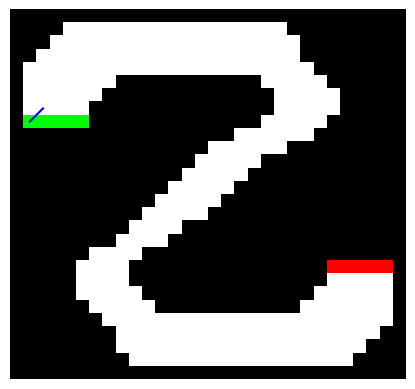



##############################
####.................#########
###...................########
##....................########
#......................#######
#.......###########.....######
#......#############.....#####
#.....##############.....#####
#CSSSS#############.....######
#################......#######
###############......#########
##############.....###########
#############.....############
############.....#############
###########.....##############
##########.....###############
#########....#################
########....##################
######....####################
#####....###############FFFFF#
#####....###############.....#
#####.....#############......#
######.....###########.......#
#######......................#
########....................##
########...................###
#########.................####
##############################


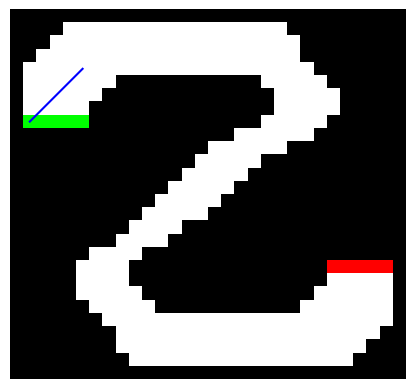



##############################
####.................#########
###...................########
##....................########
#......................#######
#.......###########.....######
#......#############.....#####
#.....##############.....#####
#CSSSS#############.....######
#################......#######
###############......#########
##############.....###########
#############.....############
############.....#############
###########.....##############
##########.....###############
#########....#################
########....##################
######....####################
#####....###############FFFFF#
#####....###############.....#
#####.....#############......#
######.....###########.......#
#######......................#
########....................##
########...................###
#########.................####
##############################


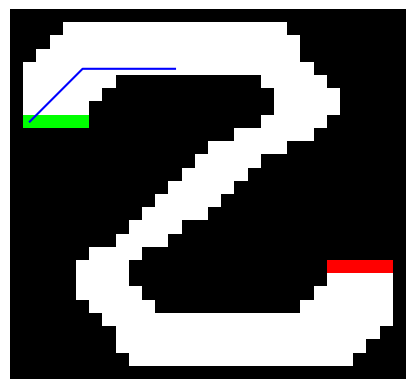



##############################
####.................#########
###...................########
##....................########
#......................#######
#.......###########.....######
#......#############.....#####
#.....##############.....#####
#CSSSS#############.....######
#################......#######
###############......#########
##############.....###########
#############.....############
############.....#############
###########.....##############
##########.....###############
#########....#################
########....##################
######....####################
#####....###############FFFFF#
#####....###############.....#
#####.....#############......#
######.....###########.......#
#######......................#
########....................##
########...................###
#########.................####
##############################


KeyboardInterrupt: Interrupted by user

In [315]:
r = RaceTrack(TRACK_NAME)
c = Car(r)
x_coord = [c.xPos]
y_coord = [c.yPos]
graph = makePlot(r)
r.printTrack(c)
while True:
    userInput = input("Enter xAccel and yAccel: ")
    xA = int(userInput.split(",")[0]) + x_coord[len(x_coord)-1]
    yA = int(userInput.split(",")[1]) + y_coord[len(y_coord)-1]
    x_coord.append(xA)
    y_coord.append(yA)
    #c.updatePos(xA, yA)

    graph = makePlot(r)
    graph.plot(x_coord,y_coord,linestyle = '-', color = 'blue')
    graph.show()
    r.printTrack(c)


In [238]:
possibleStates = r.startStates + r.track + r.finishStates
possibleActions = []
for xA in [-1,0,1]:
    for yA in [-1,0,1]:
        possibleActions.append((xA, yA))
print(possibleStates)
print(possibleActions)
qTable = np.zeros((len(possibleStates), len(possibleActions)))
print(qTable)

[(1, 8), (2, 8), (3, 8), (4, 8), (5, 8), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2), (12, 2), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (10, 3), (11, 3), (12, 3), (13, 3), (14, 3), (15, 3), (16, 3), (17, 3), (18, 3), (19, 3), (20, 3), (21, 3), (1, 4), (2, 4), (3, 4), (4, 4), (5, 4), (6, 4), (7, 4), (8, 4), (9, 4), (10, 4), (11, 4), (12, 4), (13, 4), (14, 4), (15, 4), (16, 4), (17, 4), (18, 4), (19, 4), (20, 4), (21, 4), (22, 4), (1, 5), (2, 5), (3, 5), (4, 5), (5, 5), (6, 5), (7, 5), (19, 5), (20, 5), (21, 5), (22, 5), (23, 5), (1, 6), (2, 6), (3, 6), (4, 6), (5, 6), (6, 6), (20, 6), (21, 6), (22, 6), (23, 6), (24, 6), (1, 7), (2, 7), (3, 7), (4, 7), (5, 7), (20, 7), (21, 7), (22, 7), (23, 7), (24, 7), (19, 8),